In [74]:
# Celda 1: Importar librerías
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Celda 2: Leer datos
#df = pd.read_excel("Online Retail.xlsx")

# Ruta al archivo
#df = pd.read_excel(r"C:\Users\letic\Downloads\online+retail\Online Retail.xlsx")
ruta_archivo = (r"C:\Users\letic\Documents\Taller_Retail\Online Retail.xlsx")


# Leer el archivo .xls
df = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas
df.head()
print(df.head()) 



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [76]:
#Mostrar resumen de la BD
print("Dimensiones originales:", df.shape)
print("Columnas:", df.columns)
print("Valores nulos por columna:\n", df.isnull().sum())

Dimensiones originales: (541909, 8)
Columnas: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
Valores nulos por columna:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [78]:
#LIMPIEZA
# Eliminar filas con CustomerID nulo
df = df.dropna(subset=['CustomerID'])

# Filtrar Quantity y UnitPrice positivos
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convertir InvoiceDate a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Crear columna TotalAmount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Verificar datos limpios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None


In [79]:
import sqlite3

# Conexión a la base de datos
conn = sqlite3.connect('online_retail.db')

# Guardar el DataFrame en SQLite
df.to_sql('retail_data', conn, if_exists='replace', index=False)

# Cerrar conexión
conn.close()
#test
# Mostrar las primeras filas del DataFrame
print(df.head())

#datos limpios 
print(df.info())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 

In [70]:
# Leer datos desde SQLite
conn = sqlite3.connect('online_retail.db')
df_sql = pd.read_sql('SELECT * FROM retail_data', conn)
conn.close()

# Resumen estadístico
print(df_sql.describe())

# Tipos de datos y nulos
print(df_sql.info())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
d

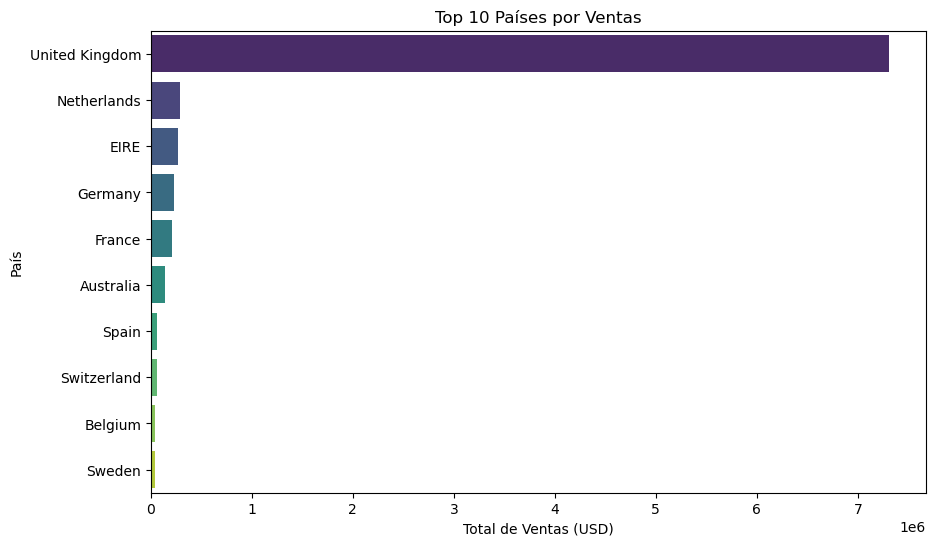

'C:\\Users\\letic\\Documents\\Taller_Retail\\Figuras\\ventas_por_pais.png'

In [86]:
#Visualización: 
import matplotlib.pyplot as plt
import seaborn as sns

output_folder = (r"C:\Users\letic\Documents\Taller_Retail\Figuras")
#output_folder = "Figuras1"  # Subcarpeta relativa
os.makedirs(output_folder, exist_ok=True)

# Agrupar por país
sales_by_country = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette="viridis")
plt.title('Top 10 Países por Ventas')
plt.xlabel('Total de Ventas (USD)')
plt.ylabel('País')
plt.savefig(os.path.join(output_folder, 'ventas_por_pais.png'))
plt.savefig('ventas_por_pais.png')
plt.show() 
plt.close()
ruta=os.path.join(output_folder, 'ventas_por_pais.png')
ruta

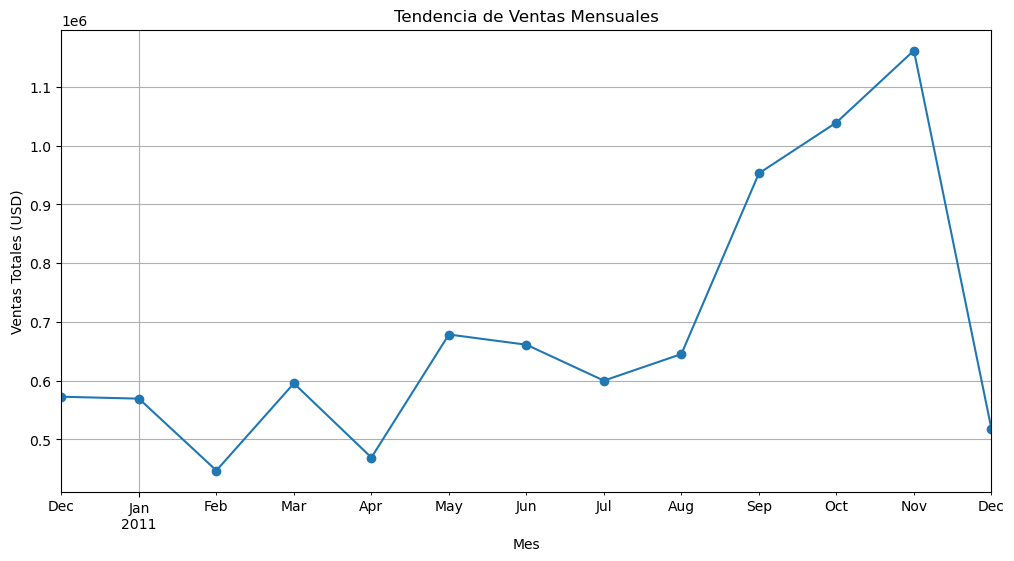

In [90]:
#Figura 2: Tendencia Mensual de Ventas

import matplotlib.pyplot as plt
import seaborn as sns

#output_folder = "Figuras"  # Subcarpeta relativa
#os.makedirs(output_folder, exist_ok=True)

# Agrupar por mes
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TotalAmount'].sum()

# Lineplot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales (USD)')
plt.grid()
plt.savefig(os.path.join(output_folder, 'tendencia_mensual.png'))
#plt.savefig('tendencia_mensual.png')
plt.show()
plt.close()

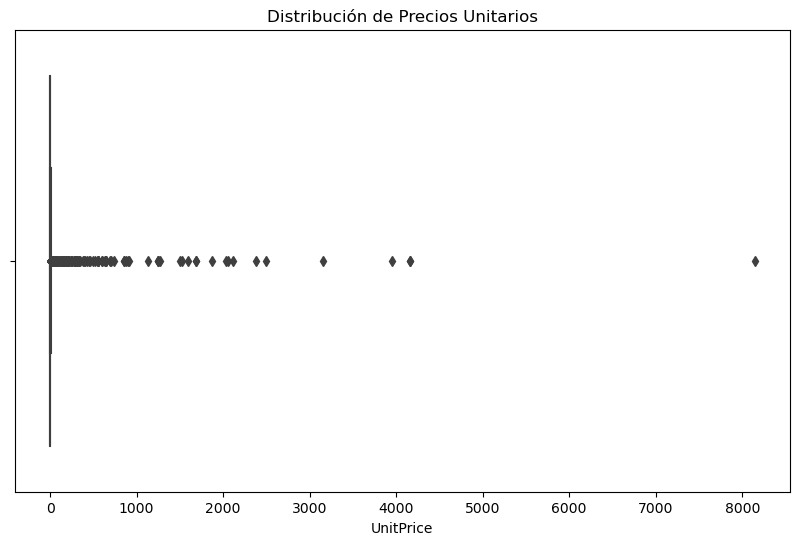

In [91]:
#Distribución de precios unitarios
import matplotlib.pyplot as plt
import seaborn as sns

#output_folder = "Figuras"  # Subcarpeta relativa
#os.makedirs(output_folder, exist_ok=True)

# Boxplot de UnitPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Distribución de Precios Unitarios')
plt.savefig(os.path.join(output_folder, 'distribucion_precios.png'))
plt.savefig('distribucion_precios.png')
plt.show() 
plt.close()


In [48]:
# Verificar que los gráficos se guardaron
expected_files = ['ventas_por_pais.png', 'tendencia_mensual.png']
for file in expected_files:
    path = os.path.join(output_folder, file)
    if os.path.exists(path):
        print(f"✅ {file} guardado correctamente en: {path}")
    else:
        print(f"❌ {file} NO encontrado. Revisa la ruta.")

✅ ventas_por_pais.png guardado correctamente en: Figuras\ventas_por_pais.png
❌ tendencia_mensual.png NO encontrado. Revisa la ruta.


"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
